In [46]:
import tensorflow as tf
from keras import layers
import keras

import numpy as np
import matplotlib.pyplot as plt
import visualkeras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


print(tf.__version__)

2.13.1


In [47]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [48]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

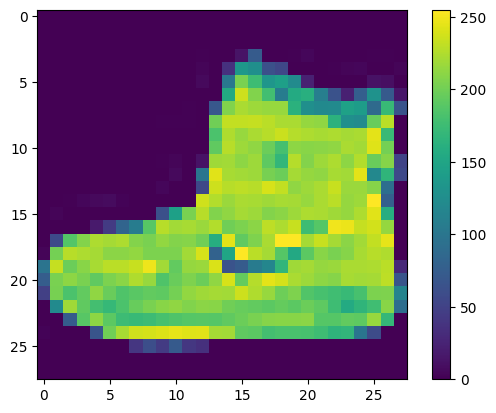

In [49]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
train_images = train_images / 255.0

test_images = test_images / 255.0

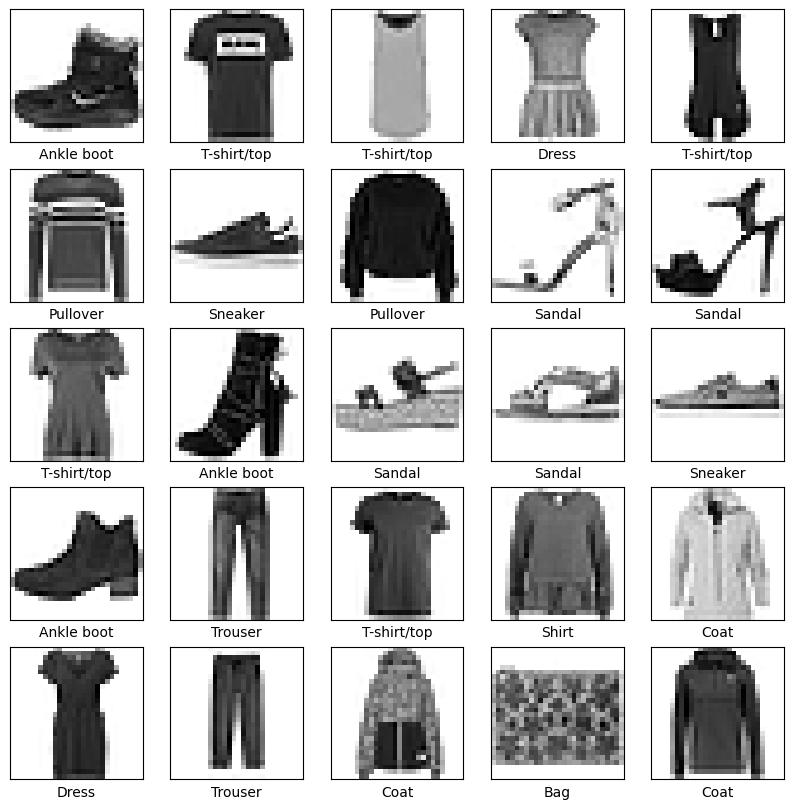

In [51]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [52]:
# num_classes = 10
# input_shape = (28, 28, 1)

# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

input_shape = (28, 28, 1)
num_classes = 10

model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, kernel_size=(3, 3), activation="relu", input_shape=input_shape
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=2)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

Epoch 1/2
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3982 - accuracy: 0.8605
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2824 - accuracy: 0.8997
313/313 - 1s - loss: 0.3077 - accuracy: 0.8901 - 773ms/epoch - 2ms/step

Test accuracy: 0.8901000022888184


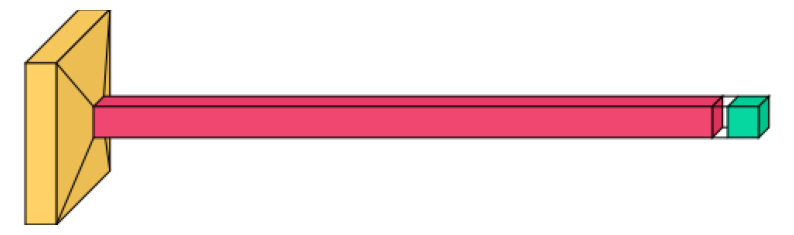

In [53]:
pil_img = visualkeras.layered_view(model)

img_array = np.array(pil_img)

plt.figure(figsize=(10, 10))
plt.imshow(img_array)
plt.axis("off")
plt.show()

In [54]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [55]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [56]:
predictions[0]

array([0.0855433 , 0.08554342, 0.0855434 , 0.08554327, 0.08554333,
       0.08586218, 0.08554394, 0.08661909, 0.08558555, 0.22867247],
      dtype=float32)

In [57]:
np.argmax(predictions[0])

9

In [58]:
test_labels[0]

9

In [59]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

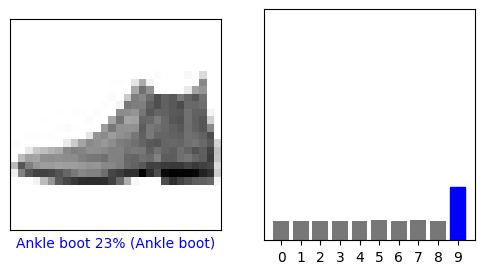

In [60]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

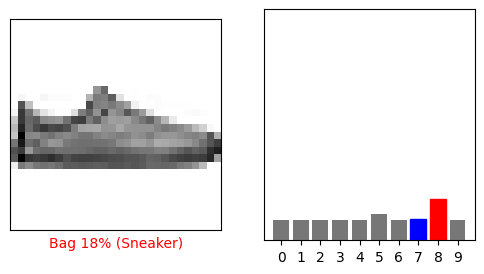

In [61]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

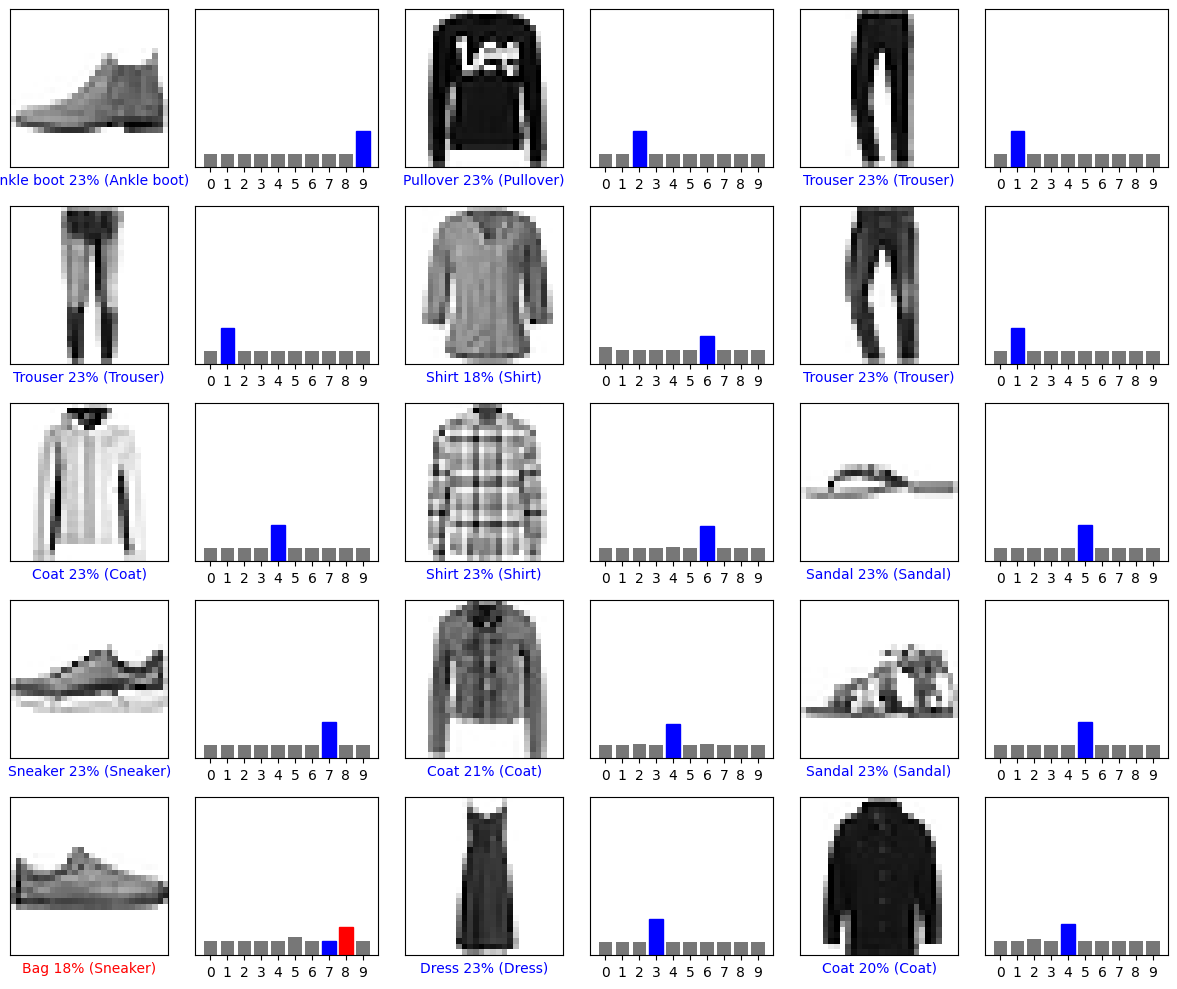

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [63]:
import pickle

model.save("../models/mnist_model_fashion.h5")